In [15]:
!pip install yfinance

In [16]:
import yfinance as yf

tesla = "TSLA"

start = "2018-1-1"
end = "2023-12-31"

data = yf.download(tesla, start = start, end = end)

[*********************100%%**********************]  1 of 1 completed


In [17]:
import pandas as pd

In [18]:
data.reset_index(inplace=True)  # Нулиране на индекса, за да стане 'Date' колона

print(data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [19]:
data = data[["Date","Close"]]
data.columns = ["ds","y"]
data

,ds,y
0,2018-01-02,21.368668
1,2018-01-03,21.150000
2,2018-01-04,20.974667
3,2018-01-05,21.105333
4,2018-01-08,22.427334
...,...,...
1504,2023-12-22,252.539993
1505,2023-12-26,256.609985
1506,2023-12-27,261.440002
1507,2023-12-28,253.179993


In [20]:
!pip install prophet

In [21]:
train_data = data[(data['ds'] >= '2018-01-01') & (data['ds'] <= '2022-12-31')]
test_data = data[(data['ds'] >= '2023-01-01') & (data['ds'] <= '2023-12-31')]

In [22]:
import io, os, sys, setuptools, tokenize
from prophet import Prophet
p = Prophet(daily_seasonality=True)
p.fit(train_data)
future = p.make_future_dataframe(periods=365)
data_forecast = p.predict(future)

08:39:40 - cmdstanpy - INFO - Chain [1] start processing
08:39:41 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
data_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-02,20.675443,-3.757379,56.700523,20.675443,20.675443,6.091848,6.091848,6.091848,-1.699375,...,-0.050757,-0.050757,-0.050757,7.841979,7.841979,7.841979,0.0,0.0,0.0,26.767291
1,2018-01-03,20.679681,-0.931871,59.316465,20.679681,20.679681,8.183853,8.183853,8.183853,-1.699375,...,0.111649,0.111649,0.111649,9.771578,9.771578,9.771578,0.0,0.0,0.0,28.863533
2,2018-01-04,20.683918,1.243386,59.373733,20.683918,20.683918,9.587033,9.587033,9.587033,-1.699375,...,-0.358595,-0.358595,-0.358595,11.645003,11.645003,11.645003,0.0,0.0,0.0,30.270951
3,2018-01-05,20.688156,2.051861,59.839244,20.688156,20.688156,10.808142,10.808142,10.808142,-1.699375,...,-0.922928,-0.922928,-0.922928,13.430445,13.430445,13.430445,0.0,0.0,0.0,31.496298
4,2018-01-08,20.700869,7.678397,66.625149,20.700869,20.700869,17.076366,17.076366,17.076366,-1.699375,...,0.795788,0.795788,0.795788,17.979953,17.979953,17.979953,0.0,0.0,0.0,37.777235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,2023-12-26,57.290076,-33.550517,131.891338,-23.012070,130.255618,-6.819088,-6.819088,-6.819088,-1.699375,...,-0.050757,-0.050757,-0.050757,-5.068957,-5.068957,-5.068957,0.0,0.0,0.0,50.470988
1620,2023-12-27,56.905071,-32.657736,133.837608,-23.912657,130.089581,-5.346963,-5.346963,-5.346963,-1.699375,...,0.111649,0.111649,0.111649,-3.759238,-3.759238,-3.759238,0.0,0.0,0.0,51.558108
1621,2023-12-28,56.520066,-32.156261,133.724388,-24.892404,129.924073,-4.330261,-4.330261,-4.330261,-1.699375,...,-0.358595,-0.358595,-0.358595,-2.272291,-2.272291,-2.272291,0.0,0.0,0.0,52.189806
1622,2023-12-29,56.135061,-29.252076,135.068779,-25.652694,129.804146,-3.254642,-3.254642,-3.254642,-1.699375,...,-0.922928,-0.922928,-0.922928,-0.632339,-0.632339,-0.632339,0.0,0.0,0.0,52.880420


D:\JN\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



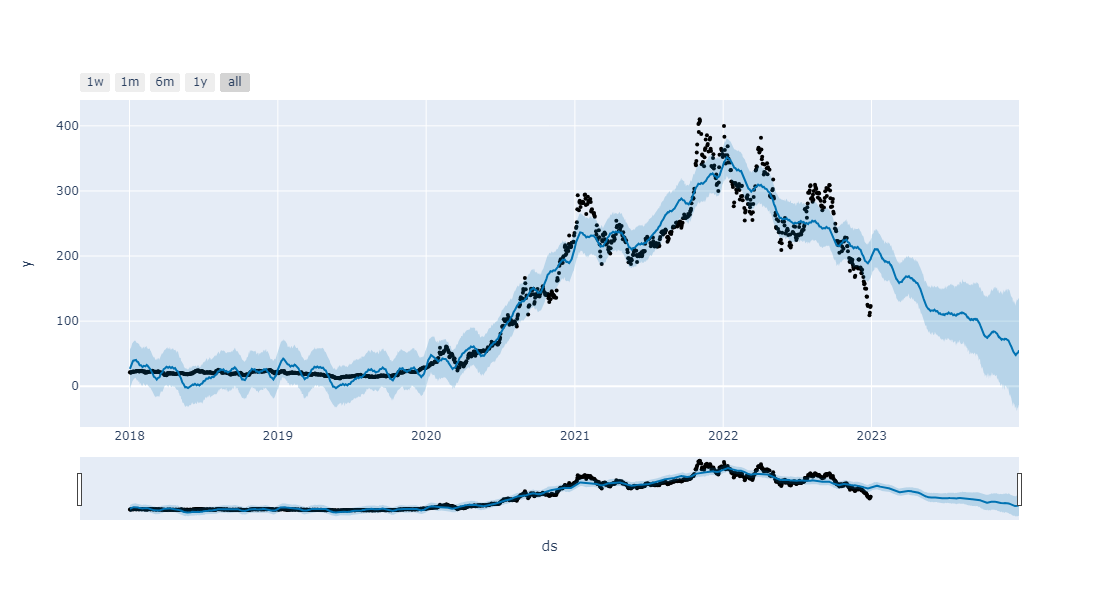

In [24]:
from prophet.plot import plot_plotly
plot_plotly(p, data_forecast)

D:\JN\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\JN\Lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\JN\Lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\JN\Lib\site-packages\prophet\plot.py:397: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future

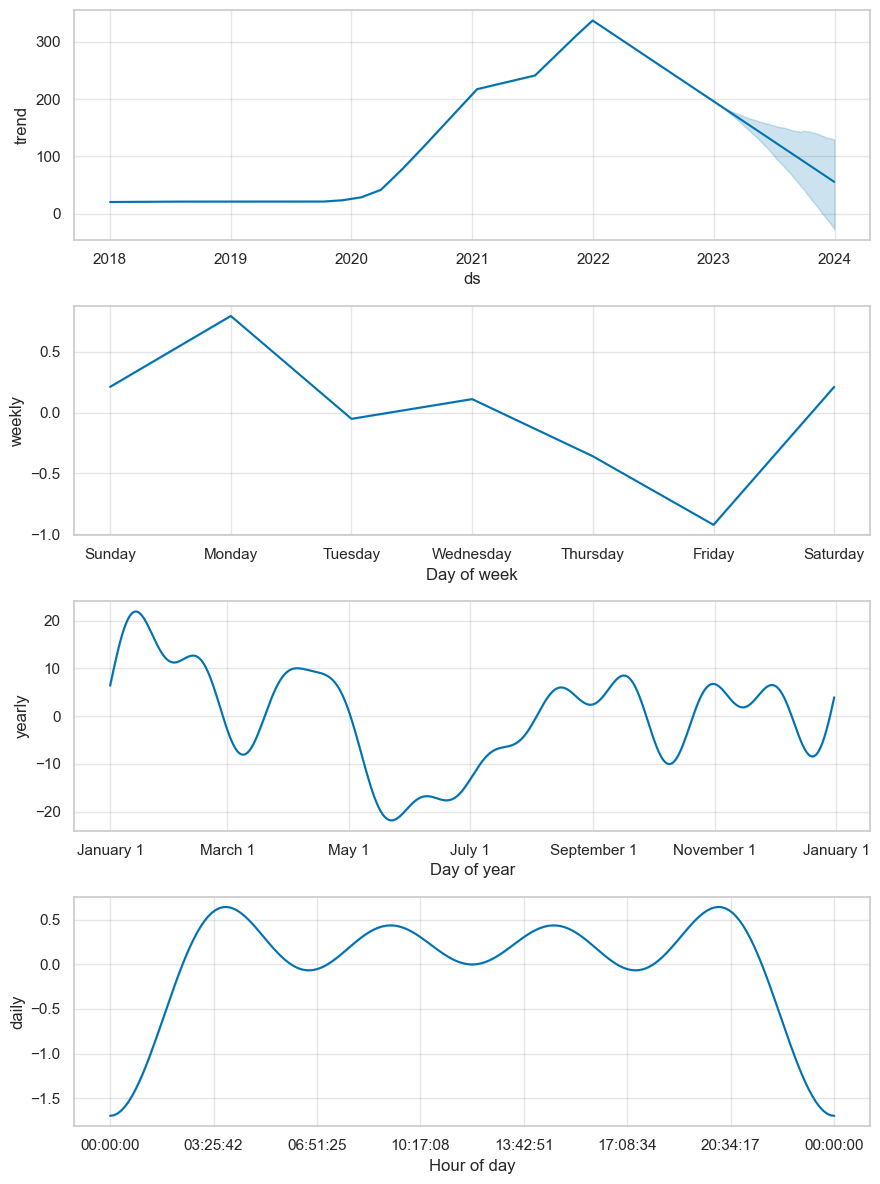

In [25]:
tesla_data_plot = p.plot_components(data_forecast)

D:\JN\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\JN\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



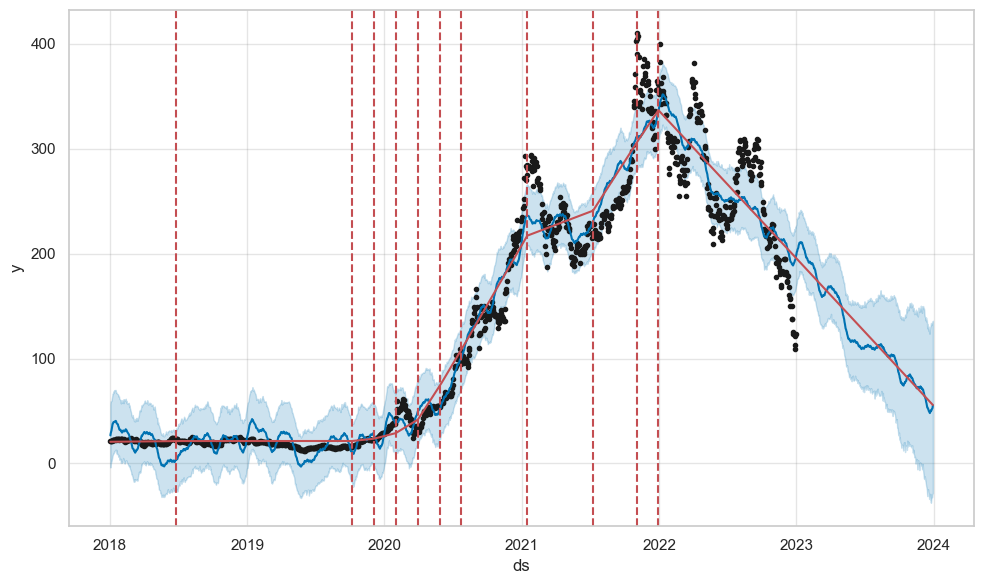

In [26]:
from prophet.plot import add_changepoints_to_plot
data_fig = p.plot(data_forecast)
a = add_changepoints_to_plot(data_fig.gca(), p, data_forecast)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

test_forecast = data_forecast[(data_forecast['ds'] >= '2023-01-01') & (data_forecast['ds'] <= '2023-12-31')]
test_forecast = test_forecast[test_forecast['ds'].isin(test_data['ds'])]

rmse = mean_squared_error(test_data['y'], test_forecast['yhat'], squared=False)
mae = mean_absolute_error(test_data['y'], test_forecast['yhat'])
mape = np.mean(np.abs((test_data['y'] - test_forecast['yhat']) / test_data['y'])) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

RMSE: 123.38969270801984
MAE: 105.36408722095575
MAPE: 36.40350081476427


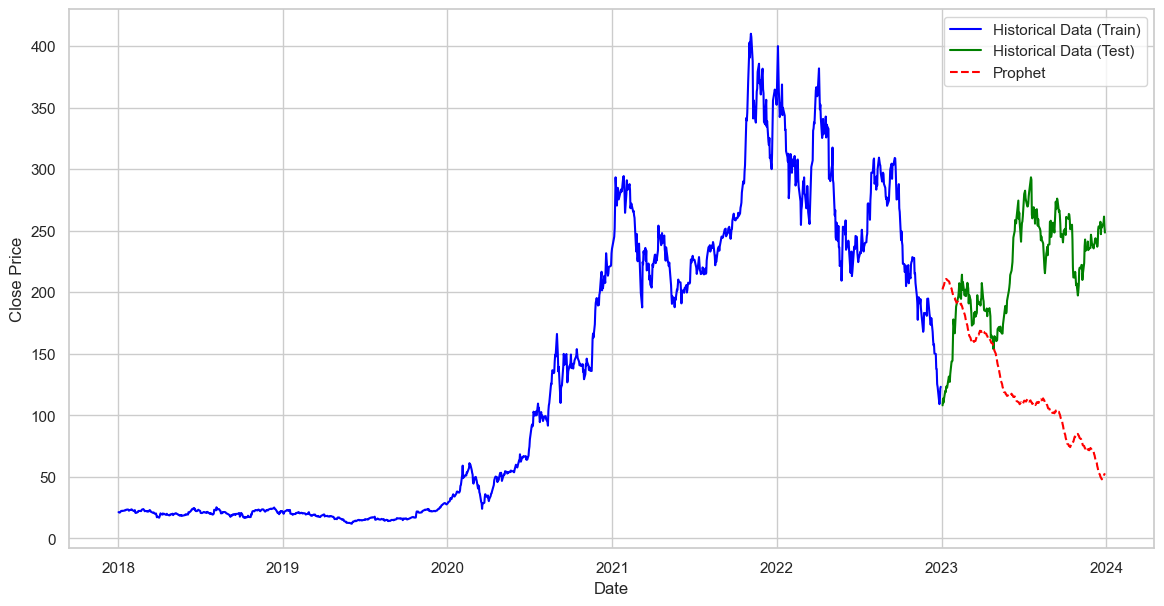

In [28]:
import matplotlib.pyplot as plt

# Визуализация на историческите данни и прогнозата
plt.figure(figsize=(14, 7))
plt.plot(train_data['ds'], train_data['y'], label='Historical Data (Train)', color='blue')
plt.plot(test_data['ds'], test_data['y'], label='Historical Data (Test)', color='green')
plt.plot(test_data['ds'], test_forecast['yhat'], label='Prophet', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()